# RoughType: ML Model Explainability&Reasoning
This notebook covers Tasks **1.2, 1.5, and 1.6**.

## Task 1.2: Model Training

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load data
df = pd.read_csv("player_performance_log_large.csv")

# Preprocessing
X = df[["wpm", "combo_length", "mistake_count", "recent_accuracy", "wave_number"]]
y = df["difficulty_label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model trained with accuracy:", model.score(X_val, y_val))


Model trained with accuracy: 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Task 1.5: Model Explainability with SHAP

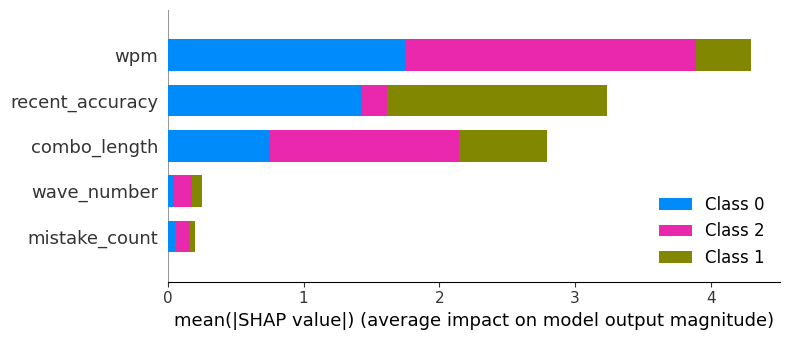

In [2]:
import shap

# Load model & data
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
X_scaled = scaler.transform(X)

# SHAP values
explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled[:100])

# Summary plot
shap.summary_plot(shap_values, X_scaled[:100], feature_names=X.columns)


## Task 1.6: Prediction Reasoning

Example Case 1: Medium-Performing Player

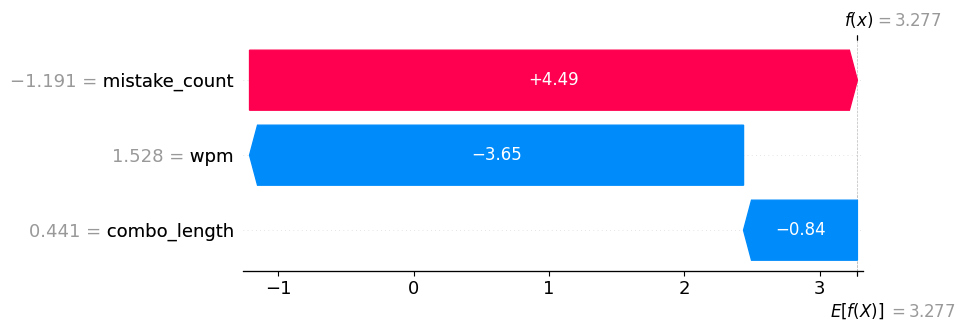

In [3]:
import numpy as np

# Prepare sample
sample = pd.DataFrame([{
    "wpm": 65,
    "combo_length": 12,
    "mistake_count": 1,
    "recent_accuracy": 0.92,
    "wave_number": 5
}])
sample_scaled = scaler.transform(sample)

# SHAP explanation for class 0 (easy)
shap_values_sample = explainer(sample_scaled)
class_index = 0

explanation = shap.Explanation(
    values=shap_values_sample.values[0][class_index],
    base_values=shap_values_sample.base_values[0][class_index],
    data=sample_scaled[0],
    feature_names=X.columns.tolist()
)

shap.plots.waterfall(explanation)


Example Case 2: Low WPM, High Mistakes

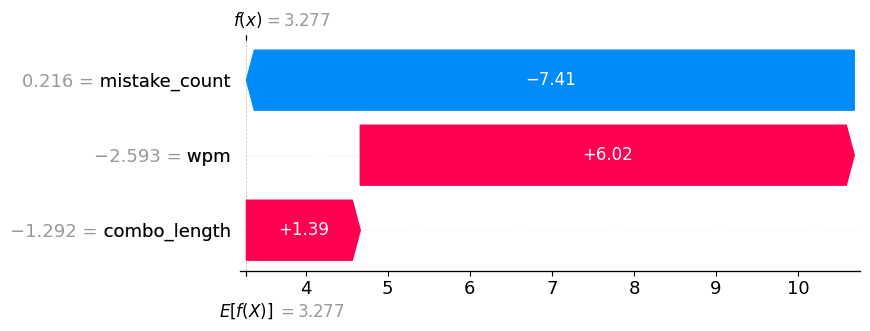

In [4]:
sample = pd.DataFrame([{
    "wpm": 25,
    "combo_length": 2,
    "mistake_count": 5,
    "recent_accuracy": 0.4,
    "wave_number": 2
}])

sample_scaled = scaler.transform(sample)

shap_values_sample = explainer(sample_scaled)
class_index = 0

explanation = shap.Explanation(
    values=shap_values_sample.values[0][class_index],
    base_values=shap_values_sample.base_values[0][class_index],
    data=sample_scaled[0],
    feature_names=X.columns.tolist()
)

shap.plots.waterfall(explanation)


Example Case 3: High Accuracy, Strong Combo

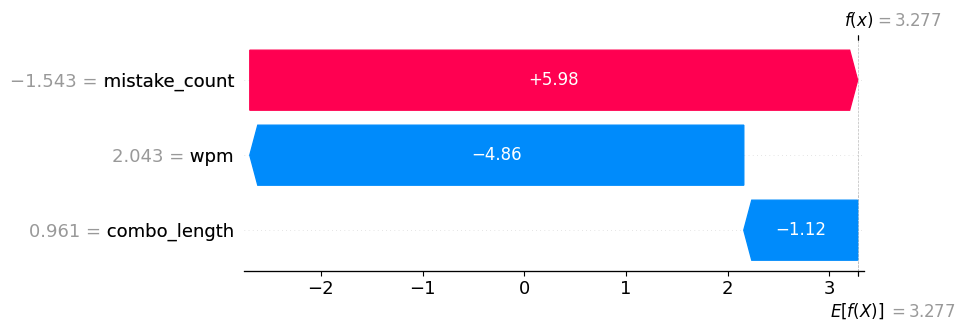

In [5]:
sample = pd.DataFrame([{
    "wpm": 70,
    "combo_length": 15,
    "mistake_count": 0,
    "recent_accuracy": 1.0,
    "wave_number": 6
}])

sample_scaled = scaler.transform(sample)

shap_values_sample = explainer(sample_scaled)
class_index = 0

explanation = shap.Explanation(
    values=shap_values_sample.values[0][class_index],
    base_values=shap_values_sample.base_values[0][class_index],
    data=sample_scaled[0],
    feature_names=X.columns.tolist()
)

shap.plots.waterfall(explanation)
